# Bike Sharing Assignment

**Prblem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to 
individuals on a short-term basis for a price or fre.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 

So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Objective** is to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the
factors affecting the demand for these shared bikes in the American market. The
company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands.    e.

e

### Initialization and Data Understanding

In [1]:
# importing the basic libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings(action="ignore")

In [3]:
# importing the dataset
df = pd.read_csv(r"C:\\Machine Learning Drive\\Linear Regression\\Assignment\\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
# we have 16 columns as below
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Based on the dictionary

	- instant: record index
	- dteday : date
 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week (0-6)
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    - weathersit : 
     	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
      	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Data does not seem to have any outliers

In [8]:
# based on data dictionary we have season as categorical column
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
#so lets remove the codes and add the actual values. 
season_dict = {1: 'spring', 2:'summer', 3: 'fall', 4: 'winter'}
season_dict

{1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

In [9]:
year_dict = {0: 2018, 1:2019}
year_dict

{0: 2018, 1: 2019}

In [10]:
# lets map the values from the dict to the data.
df['season_name'] = df.season.map(season_dict)
df['year_name'] = df.yr.map(year_dict)

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,year_name
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,2018
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,2018
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,2018
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,2018
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,2018


### EDA on Dataset

#### Columns Analysis

In [12]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
season_name    0
year_name      0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

instant        730
dteday         730
season           4
yr               2
mnth            12
holiday          2
weekday          7
workingday       2
weathersit       3
temp           498
atemp          689
hum            594
windspeed      649
casual         605
registered     678
cnt            695
season_name      4
year_name        2
dtype: int64

1. We have 2 columns which do not hold any information - 'instant'
2. Dates column 'dteday' does not give info any more than we already have from 'yr', 'mnth', 'holiday', 'weekday', 'workingday'.
3. Columns 'casual', 'registered' are not the features of the dataset so we dont need them. 

In [15]:
# Based on the analysis, we can understand the numerical and categorical columns
num_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols=['season_name', 'year_name', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [16]:
# We can also identify that the columns we have for 'temp', 'atemp', 'hum', 'windspeed' and others are the continuous values.

#### Univariate Analysis

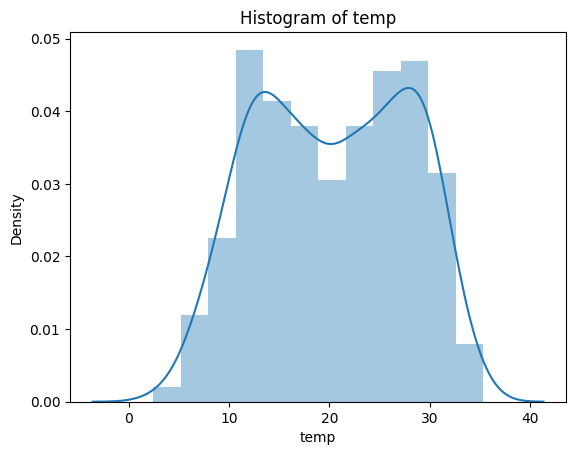

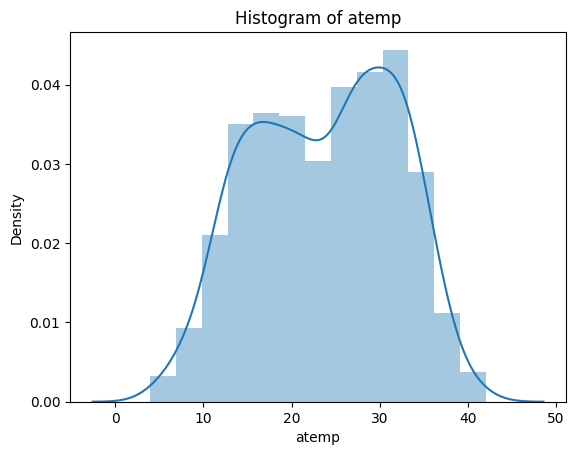

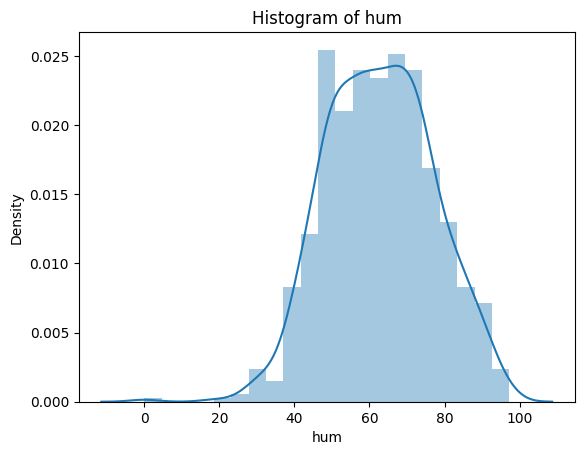

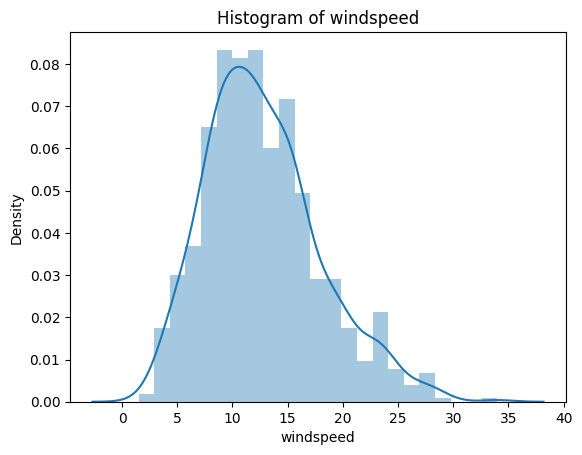

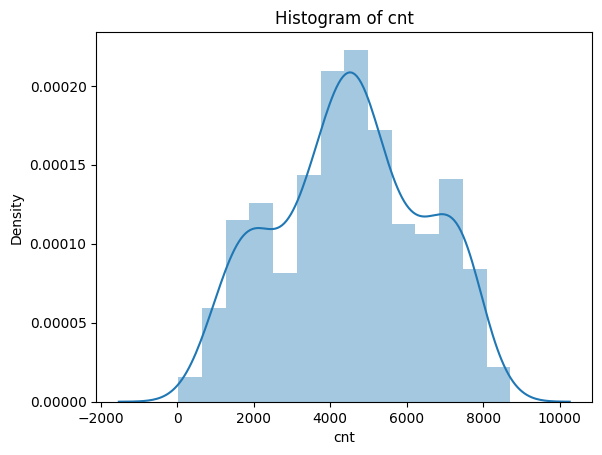

In [17]:
# plot the histogram for the numerical column
for col in num_cols:
    sns.distplot(df[col])
    plt.title(f'Histogram of {col}')
    plt.ylabel('Density')
    plt.xlabel(col)
    plt.show()

Observations
1. temp - Most often temp range is 10 - 30
2. atemp - Most often temp range is 12 - 35
3. hum - Humedity lies in the range of 45 - 75
4. windspeed - Always lies in the 5 - 20
5. temp and atemp have almost the same distribition.
6. windspeed is a bit right skewed

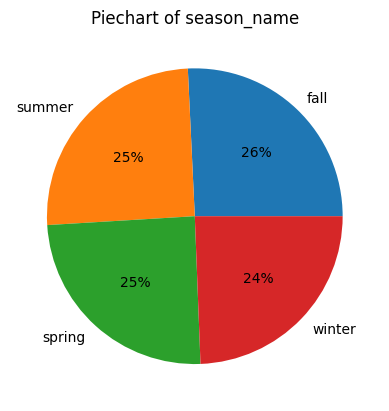

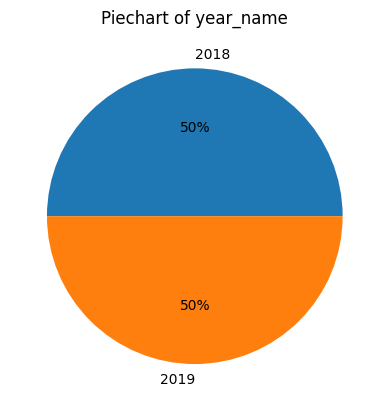

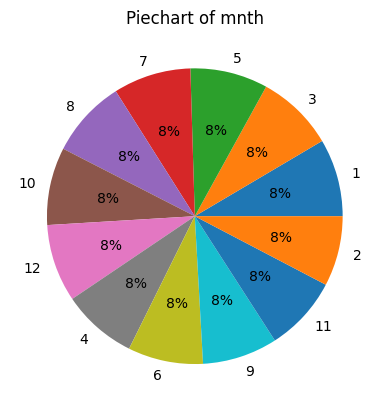

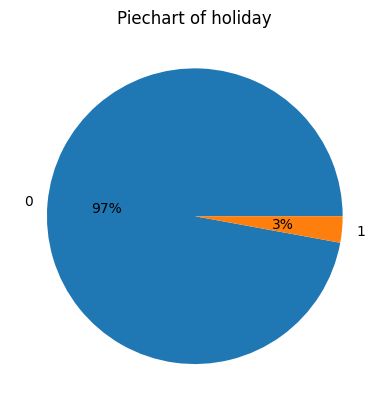

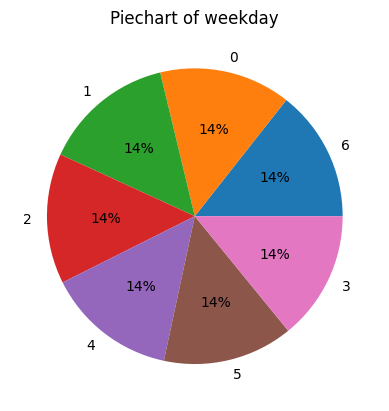

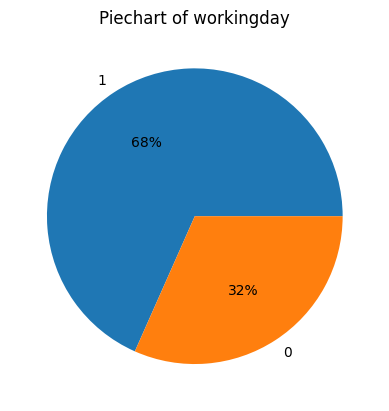

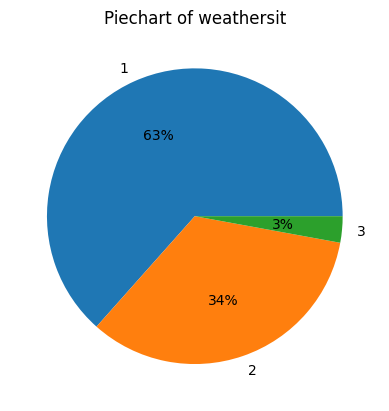

In [18]:
# plot the piechart for the numerical column
for col in cat_cols:
    values=df[col].value_counts().values
    index=df[col].value_counts().index
    plt.pie(values, labels=index, autopct='%1.00f%%')
    plt.title(f'Piechart of {col}')
    plt.show()

We see the equal distribution of Bike usage for 'season', 'weekday', 'mnth' is same.


#### Bivariate Analysis

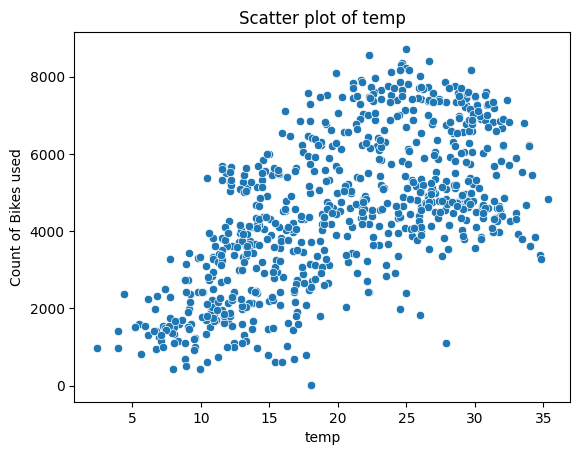

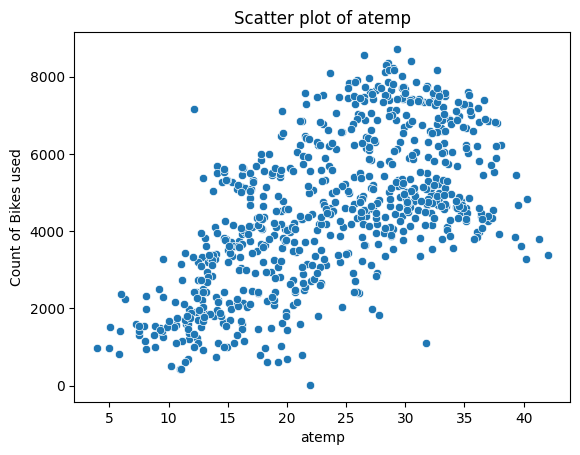

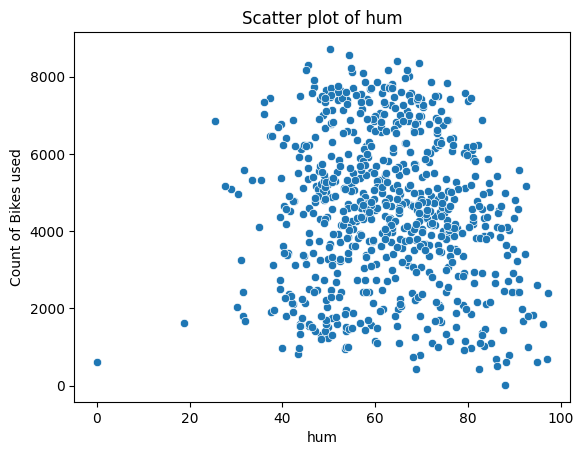

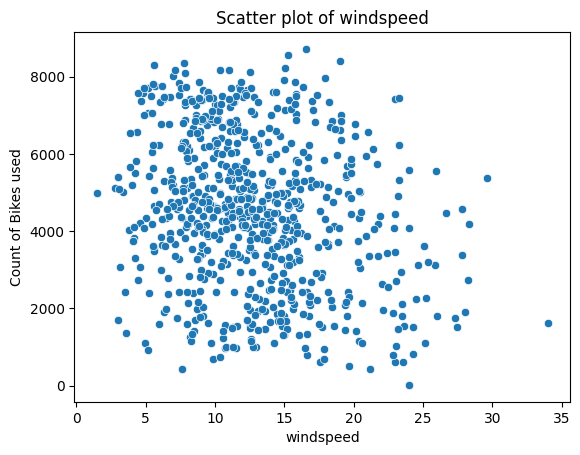

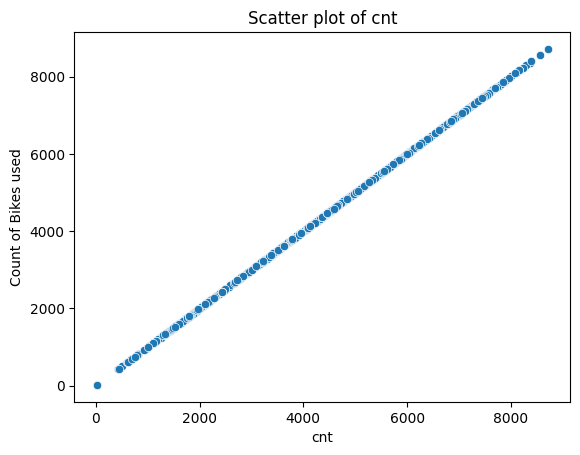

In [19]:
#Since target column here is 'cnt', we will plot the values against the same.
for col in num_cols:
    sns.scatterplot(x = df[col], y=df['cnt'])
    plt.title(f'Scatter plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Bikes used')
    plt.show()

1. temp and atemp sort of follow linear relationship with the cnt column
2. Humidity does not follow linear relationship. But demand does increase when humidity is above 40.
3. Windspeed sort of follows opposite pattern than Humidity. We have Bike usage more for windspeed between say 3 - 30.

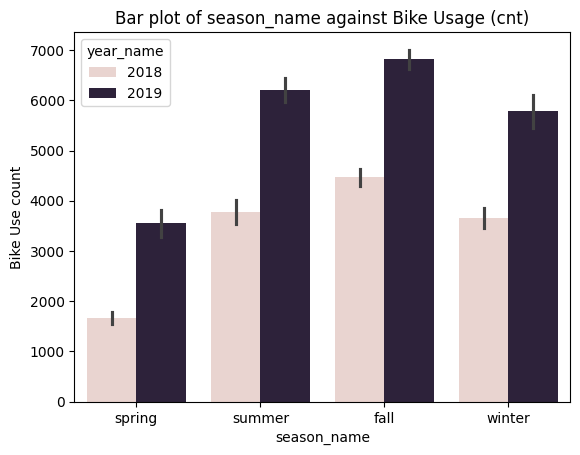

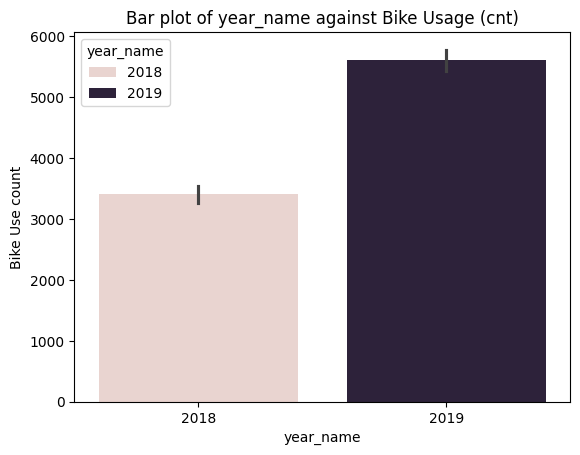

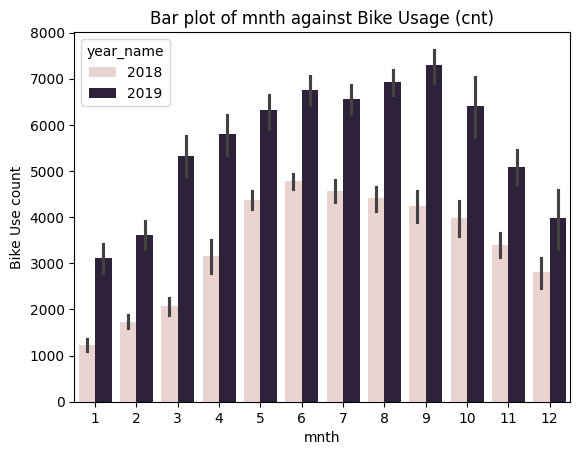

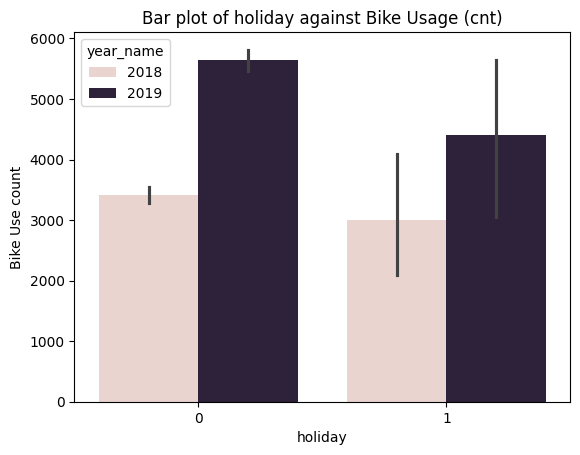

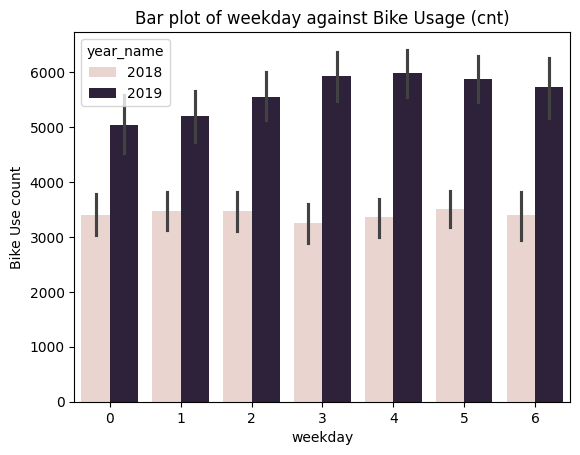

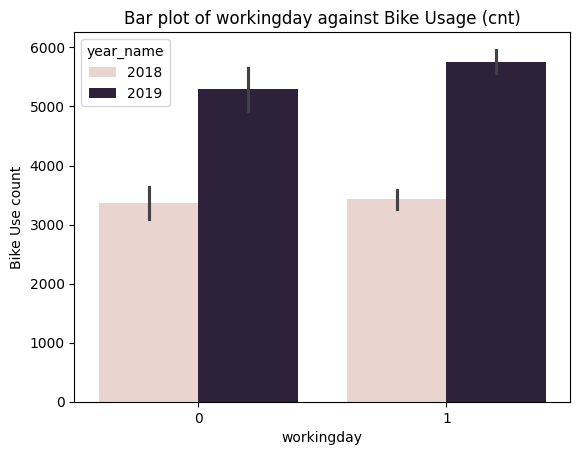

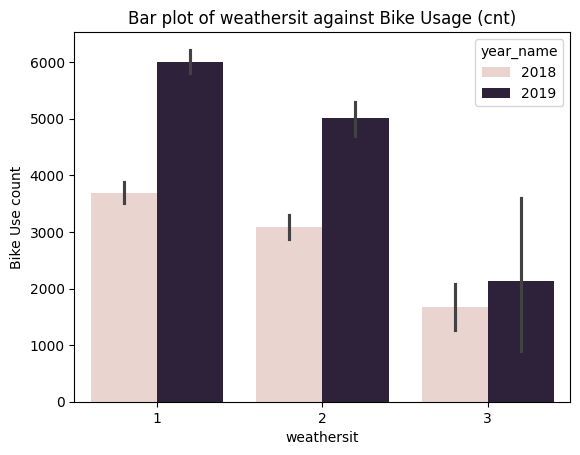

In [20]:
for col in cat_cols:
    sns.barplot(data=df, x = col, y = 'cnt', hue='year_name')
    plt.title(f'Bar plot of {col} against Bike Usage (cnt)')
    plt.ylabel('Bike Use count')
    plt.show()

1. Year on Year, the Bike usage has increased for all seasons
2. In 2018, Bike usage increased after March and stayed over 3000 for rest of the year. 
3. In 2019, Bike usage increased after Feb and stayed over 5000 till Nov. September had the highest usage.
4. Use of bikes is less at the start and end of the year.
5. Bike usage is almost same for all days of the week except on Holiday.
6. People use Bike most for weathersit 1 i.e. when its Clear, Few clouds, Partly cloudy, Partly cloudy. This is same for both years even though overall volume for 2018 is less than 2019.

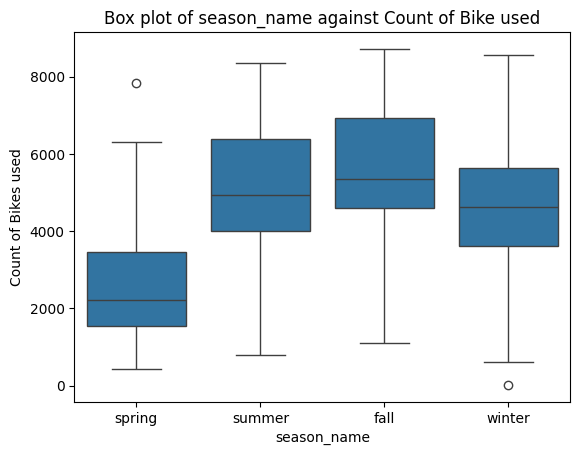

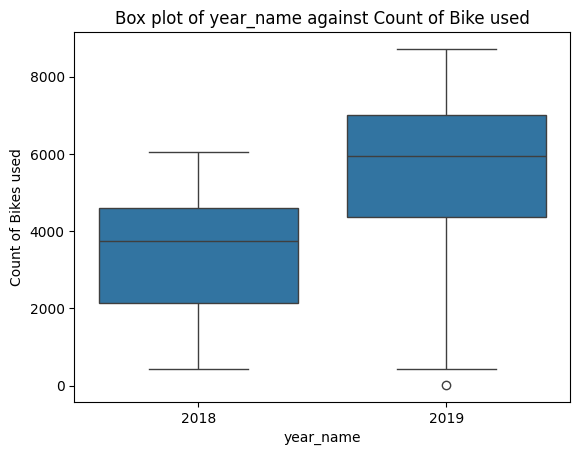

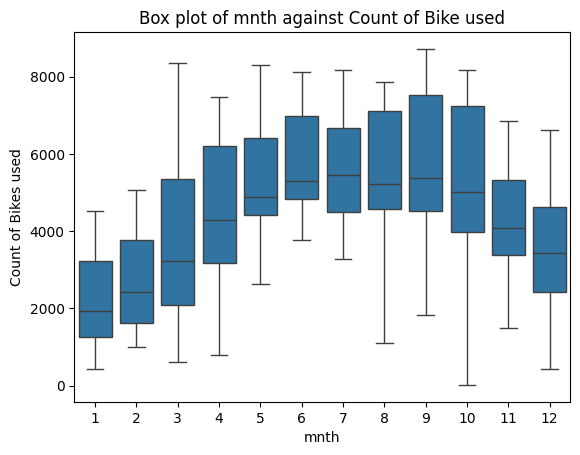

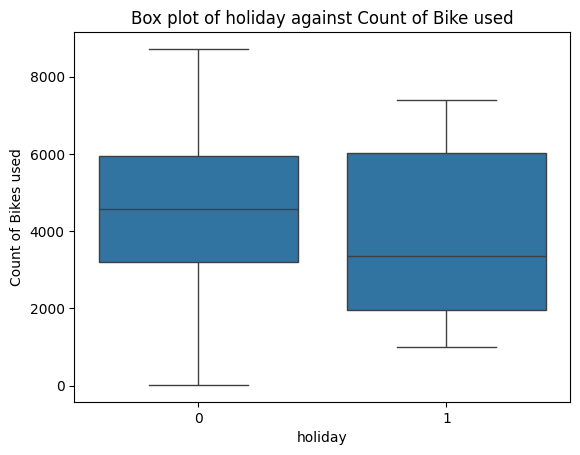

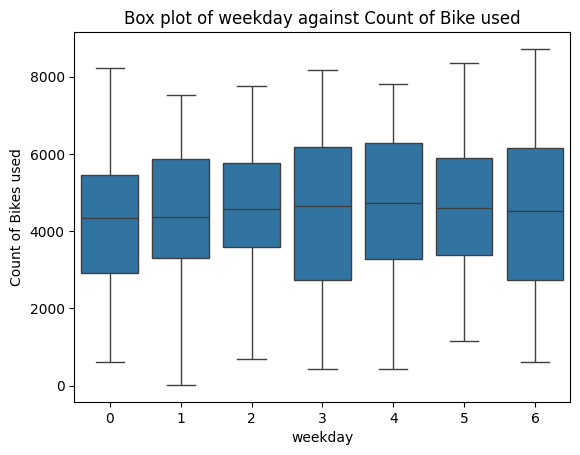

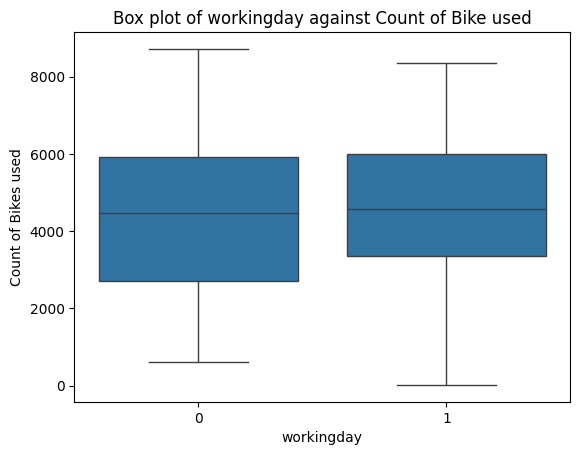

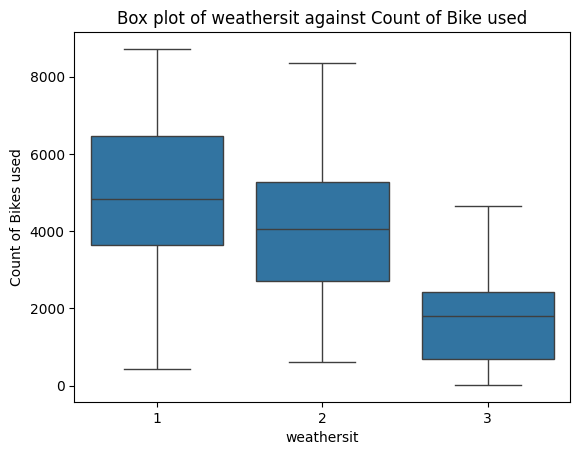

In [21]:
#We will also plot the box plot of all the variables against the cnt feature.

for col in cat_cols:
    sns.boxplot(x = col, y = 'cnt', data=df)
    plt.title(f'Box plot of {col} against Count of Bike used')
    plt.xlabel(col)
    plt.ylabel('Count of Bikes used')
    plt.show()

1. Sping season has the lowest bike usage. Rest of the seasons have high usage.

#### Multivariate Analysis

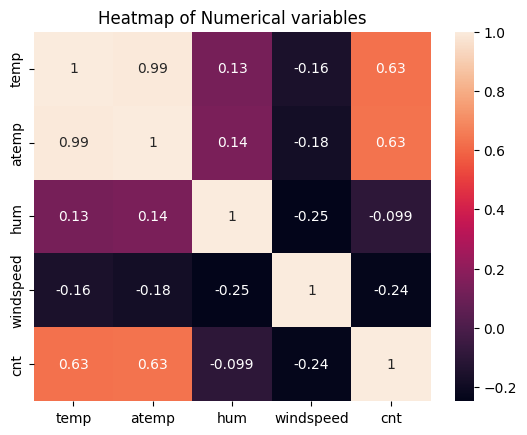

In [22]:
# plot heatmap for the numerical values. 
sns.heatmap(df[num_cols].corr(), annot = True)
plt.title('Heatmap of Numerical variables')
plt.show()

1. Here we see Bivariate analysis observation true as temp and atemp follows linear relationship with usage of the Bike.
2. Humedity and Windspeed does not show good relationship.

In [23]:
df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<Axes: >

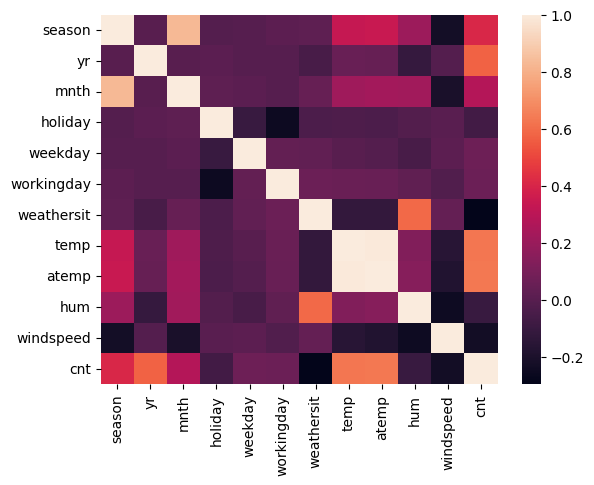

In [24]:
sns.heatmap(df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())

### Getting required data

In [25]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_name', 'year_name'],
      dtype='object')

Based on our below observation 

    1. We have 2 columns which do not hold any information - 'instant'and 'dteday'
    2. Dates column 'dteday' does not give info any more than we already have from 'yr', 'mnth', 'holiday', 'weekday', 'workingday'.
    3. Columns 'casual', 'registered' are not the features of the dataset so we dont need them. 

we can remove the columns 'instant', 'casual', 'registered' as they are not useful for the task.

In [26]:
# craete the list of the columns to drop.
drop_cols1 = ['instant', 'dteday', 'casual', 'registered']

In [27]:
# always create a new dataset so you dont loose any data. 
df1 = df.drop(columns=drop_cols1, axis=1)
print('Shape of the original dataset : ', df.shape)
print('Shape of the new dataset : ', df1.shape)

Shape of the original dataset :  (730, 18)
Shape of the new dataset :  (730, 14)


In [28]:
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_name',
       'year_name'],
      dtype='object')

In [29]:
#We also added 2 columns Season_name and year_name for the understanding of the dataset. So lets get rid of them as well.
drop_cols2 = ['season_name', 'year_name']

In [30]:
# lets create another dataset so you dont loose any data. 
df2 = df1.drop(columns=drop_cols2, axis=1)
print('Shape of the original dataset : ', df1.shape)
print('Shape of the new dataset : ', df2.shape)

Shape of the original dataset :  (730, 14)
Shape of the new dataset :  (730, 12)


Now we have 720 rows and 12 columns

### Create the Dummy Variables. 
1. Create the dummy variables for categorical columns which have more than 2 values.
2. No of dummy values = n-1

We need to revise the categorical and numerical column list for our new dataset.

In [35]:
df2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [39]:
#Based on the analysis, we can understand the numerical and categorical columns for df2
num_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
#but we dont need dummies for all these columns. Season and WeatherSit should suffice.

In [40]:
df2[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

Here we see that there are 4 columns which have more than 2 categorical values.
1. season - 4
2. mnth - 12
3. weekday - 7
4. weathersit - 3

So we will be creating the dummy columns for them using the pandas method get_dummies

In [61]:
df2[['season', 'weathersit']] = df2[['season', 'weathersit']].astype(object)

In [62]:
# dummy var for season
season_dum = pd.get_dummies(df2['season'], drop_first=True, dtype=int)
season_dum.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [63]:
season_dum.columns = season_dum.columns.astype(str)
season_dum.columns=['season2', 'season3', 'season4']
season_dum.columns

Index(['season2', 'season3', 'season4'], dtype='object')

In [64]:
season_dum.head()

,season2,season3,season4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [65]:
# dummy var for weathersit
weathersit_dum = pd.get_dummies(df2['weathersit'], drop_first=True, dtype=int)
weathersit_dum.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [66]:
weathersit_dum.columns = ['weather2', 'weather3']
weathersit_dum.head()

,weather2,weather3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [67]:
 weathersit_dum.nunique()

weather2    2
weather3    2
dtype: int64

In [68]:
season_dum.nunique()

season2    2
season3    2
season4    2
dtype: int64

Now we have our dummy datasets available. Those need to be added to the working dataset.

In [69]:
df_and_dummies = [df2, season_dum, weathersit_dum]
df3 = pd.concat(df_and_dummies, axis=1)
df3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season2,season3,season4,weather2,weather3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [70]:
df3.shape

(730, 17)

We have added the dummy variables. 

We still have the original variables for which we added the dummy variables. Lets remove them.

In [71]:
df3.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season2',
       'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')

In [73]:
drop_cols3 = ['season', 'weathersit']
drop_cols3

['season', 'weathersit']

In [74]:
# removing the columns from df3 and storing it in different dataset.
print('Shape of the old dataset', df3.shape)
df4 = df3.drop(columns=drop_cols3, axis=1)
print('Shape of the new dataset', df4.shape)

Shape of the old dataset (730, 17)
Shape of the new dataset (730, 15)


Our dataset is ready now.

### Creating the Train and Test Datasets

In [78]:
df4.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')

In above column list we have all the columns which are Independent variables except 'cnt' which is the count of Bikes used.

So we will have all the columns (except 'cnt') in X and only 'cnt' in the Y 

In [79]:
x = df4.drop(columns='cnt', axis=1)
x.shape

(730, 14)

In [80]:
y = df4['cnt']
y.shape

(730,)

Here y has only 1 column but its a series. So we need to convert it into the dataframe.

In [81]:
y = pd.DataFrame(y)
y.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


In [82]:
y.shape

(730, 1)

In [114]:
df4.dtypes

yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
season2         int32
season3         int32
season4         int32
weather2        int32
weather3        int32
dtype: object

In [116]:
bool_col = ['season2', 'season3', 'season4', 'weather2', 'weather3']
for col in bool_col:
    df4[col]=df4[col].astype(bool)

In [117]:
df4.dtypes

yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
season2          bool
season3          bool
season4          bool
weather2         bool
weather3         bool
dtype: object

Now we have the column size as 730 x 1 which is required. 

In [83]:
# importing the library to split the dataset into the train and test datasets.
from sklearn.model_selection import train_test_split

In [118]:
df_train, df_test = train_test_split(df4, train_size= 0.7, random_state=30)#creating test and train dataset
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


### Scaling

In [98]:
# Lets have a look at the data
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,season4,weather2,weather3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,6.403922,0.037255,3.019608,0.660784,20.167091,23.613010,62.937530,12.731523,4447.268627,0.252941,0.243137,0.239216,0.349020,0.029412
std,0.500476,3.471125,0.189572,2.035927,0.473908,7.544199,8.174624,14.186626,5.127352,1936.160541,0.435124,0.429398,0.427024,0.477128,0.169124
min,0.000000,1.000000,0.000000,0.000000,0.000000,3.993043,5.896500,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,13.632500,16.523988,51.989600,9.041985,3100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,19.611674,23.578975,62.791700,11.958227,4558.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.750000,0.000000,5.000000,1.000000,26.761028,30.398050,73.406275,15.656795,5864.250000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### What is scaling? Why is Scaling required?

Based on the range of the values, we can make 2 observations.

    a. Here we have the temp and atemp columns which are ranging from 2 to 35 and 4 to 42 resp. Numidity is ranging from 0 to 97 and Wind Speed ranging from 1.5 to 34
    b. Rest of the columns (all the dummy columns we have created) are ranging from only 0 to 1.

When we create the Regression Model, we would have 4 columns with very migh range and rest of the columns (dummy vars) with very small range (0-1)
This will create the issue when we compare the coefficient of 1 variable with other. So for the **Ease of Interpretation**, we need to make them in the same range. Then it will be easier for us to compare them.

As we use the Gradient Descent method, with values with different ranges, it would take lot of time for convergence. With feature values in same ranges, the **convergence becomes faster**. 

##### There are 2 ways of the scaling. 
**Standardisation** basically brings all of the data into a standard normal distribution with mean zero and standard deviation one. 

        x - mean(x)
    x = ------------
           sd(x)
**MinMax Scaling**, on the other hand, brings all of the data in the range of 0 and 1.

         x - min(x)
    x = ----------------
        max(x) - min(x)

In [119]:
#But we dont need to scale all the columns. Some values are alreay within the required range. List of features to be scalled are as below.
num_cols = ['mnth','weekday','temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [120]:
#num_vars
df_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')

In [121]:
df_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')

In [103]:
# We will also use the Min Max scaling to transform our data. 
from sklearn.preprocessing import MinMaxScaler

In [104]:
# Creating the object of the min max scaler
mm = MinMaxScaler()

In [122]:
# using the min max scaler object, we will fit and transform the training data.
df_train[num_cols] = mm.fit_transform(df_train[num_cols])
df_test[num_cols] = mm.fit_transform(df_test[num_cols])

In [123]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,0.491266,0.037255,0.503268,0.660784,0.516161,0.490106,0.647173,0.345580,0.509120
std,0.500476,0.315557,0.189572,0.339321,0.473908,0.240757,0.226141,0.145878,0.157766,0.222752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.307623,0.293997,0.534597,0.232055,0.354119
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.498436,0.489165,0.645673,0.321786,0.521859
75%,1.000000,0.795455,0.000000,0.833333,1.000000,0.726592,0.677806,0.754820,0.435589,0.672141
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values are now having mini value as 0 and max value as 1

This dataset x_train is our final. now we will remove the 'cnt' column from it.

We also need to remove the temp column as temp and atemp are hily correlated as shown in below heatmap.

<Axes: >

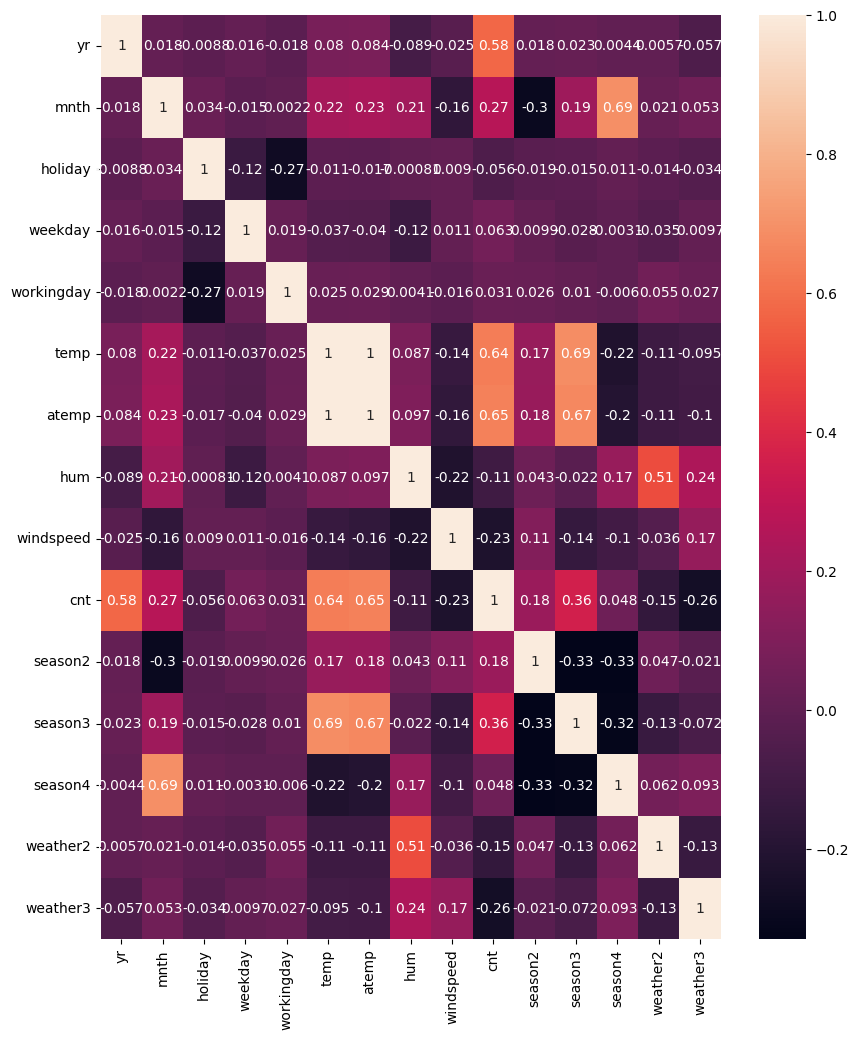

In [153]:
plt.figure(figsize=(10, 12))
sns.heatmap(df_train.corr(), annot=True)

In [158]:
print('cols before dropping: ', df_train.columns)
df_train = df_train.drop(['cnt', 'temp'], axis=1)
print('cols after dropping: ', df_train.columns)

cols before dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')
cols after dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


In [159]:
df_train.shape

(510, 13)

We also need to drop the same columns from the test dataset.

In [160]:
print('cols before dropping: ', df_test.columns)
df_test = df_test.drop(['cnt', 'temp'], axis=1)
print('cols after dropping: ', df_test.columns)

cols before dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')
cols after dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


In [161]:
df_test.shape

(220, 13)

In [163]:
print('cols before dropping: ', X_train.columns)
X_train = X_train.drop(['temp'], axis=1)
print('cols after dropping: ', X_train.columns)

cols before dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')
cols after dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


In [164]:
print('cols before dropping: ', X_test.columns)
X_test = X_test.drop(['temp'], axis=1)
print('cols after dropping: ', X_test.columns)

cols before dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'season2', 'season3', 'season4', 'weather2',
       'weather3'],
      dtype='object')
cols after dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


In [167]:
print('cols after dropping: ', X_test.columns)

cols after dropping:  Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


### Feature Selection

Out of all the features of the Independent variables, it is imperative that we select and use the required and important features for our model. 
                                                                                                                   
So, how do we select the features. we follow below steps for that.

1. Build the model with all the features
2. Drop the features that are least helpful in prediction (features with high p-value)
3. Drop the features that are redundant (using correlations and VIF, drop the features with VIF > 5)
4. Rebuild model and repeat

**Recursive Feature Elimination** is one such method of feature selection. It selects the features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features.

**Other Methods** are Forward Selection and Backward selection

In [124]:
# import the required libraries and models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

RFE requires some parameters for the calculation. Such as the estimator for which it needs to calculate the features. 
Another is the Number of features to be taken initially. 

In [126]:
estimator=LinearRegression()
rfe=RFE(estimator, n_features_to_select=11)

In [165]:
rfe_op = rfe.fit(X_train, y_train)
rfe_op.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [166]:
list(zip(X_train.columns,rfe_op.support_,rfe_op.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('season2', True, 1),
 ('season3', True, 1),
 ('season4', True, 1),
 ('weather2', True, 1),
 ('weather3', True, 1)]

rfe_op.support_ gives the output as True and False. These values basically represent if the feature is selected or not. Lets see the features selected using RFE. We can also get the rank of the variables.

In [129]:
selected_features = X_train.columns[rfe_op.support_]

In [150]:
selected_features

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')

In [130]:
print('Selected Features : ', selected_features)

Selected Features :  Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


We can perform the same steps for min max scaled features also.

**Now that we have selected our features, lets get the required dataset with imp features.**

In [134]:
X_train_df = X_train[selected_features]
X_test_df = X_test[selected_features]

In [135]:
print(X_train_df.columns)
print(X_test_df.columns)

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')
Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')


### Modelling

Next up is modeling the Regression. We know for MLR Dependent variable is a function of dependent variables.

y = w0 + w1 * x1 + w2 * x2 + w3 * x3 + ...... upto n

where wi are the weights assiciated with the features xi and w0 is the constant. We we only have our selected features and using model we will calculate the coefficients or weights for these features. But we dont have w0. So we will add it manually.

In [136]:
# importing the library
import statsmodels.api as sm

In [137]:
print('Shape of train data : ' , X_train_df.shape)

Shape of train data :  (584, 11)


In [138]:
X_train_sm = sm.add_constant(X_train_df)

In [139]:
print('Shape of train data : ' , X_train_sm.shape)

Shape of train data :  (584, 12)


Here we can see that we have added the 12th column which is our constant. Lets do the same thing for the test dataset as well

In [141]:
print('Shape of test data : ' , X_test_df.shape)

Shape of test data :  (146, 11)


In [142]:
X_test_sm = sm.add_constant(X_test_df)

In [143]:
print('Shape of test data : ' , X_test_sm.shape)

Shape of test data :  (146, 12)


Time to create a model. We will use the Ordinary Least Squares method to find the best fit line for our model.

In [144]:
model1 = sm.OLS(np.array(y_train), X_train_sm) 

In [148]:
model1_op = model1.fit()

model1_op is the LR model we have created. Let us check the how good it is

### Model Evaluation

In [149]:
model1_op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     265.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.36e-216
Time:                        11:42:36   Log-Likelihood:                -4726.2
No. Observations:                 584   AIC:                             9476.
Df Residuals:                     572   BIC:                             9529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        575.5669    173.456      3.318      0.001     234.878     916.256
yr          2008.6889     66.690     30.120      0.000    1877.702    2139.676
holiday     -641.4577    210.498     -3.047      0.002   -1054.901    -228.015
weekday       82.8463     16.462      5.032      0.000      50.512     115.181
workingday   185.4247     72.591      2.554      0.011      42.847     328.002
temp         128.8590      8.105     15.899      0.000     112.940     144.778
windspeed    -42.4051      6.600     -6.425      0.000     -55.369     -29.441
season2     1069.7428    123.918      8.633      0.000     826.353    1313.133
season3      674.2340    164.168      4.107      0.000     351.788     996.680
season4     1448.3515    104.455     13.866      0.000    1243.189    1653.514
weather2    -663.3285     70.983     -9.345      0.000    -802.747    -523.910
weather3   -2519.5413    207.243    -12.157      0.000   -2926.591   -2112.492
==============================================================================
Omnibus:                       86.213   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.095
Skew:                          -0.769   Prob(JB):                     8.79e-47
Kurtosis:                       5.520   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**
1. Here we can see that using the both models, we have R-Square value at around 0.84. For our model to work we need to have value close to 1.
2. Coefficient values are way too high and low for the Independent values ranging from -5 to 5 (approx).
3. All the P values are less than 0.05 which is correct

If the R-Square was low, there could have been 2 possible reasons for this

1. There could be multicollinearity present in the features.
2. Feature selection was incorrect.

Lets check the VIF - Variance Inflation Factor

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
#checking variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Features,const,yr,holiday,weekday,workingday,temp,windspeed,season2,season3,season4,weather2,weather3
VIF,27.47,1.01,1.08,1.01,1.07,3.29,1.09,2.6,4.64,1.87,1.04,1.04


Here we can see that all the values of the VIF are lesser than 5

**Model seems to be correct. Lets start predicting the values.**

In [177]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season2', 'season3', 'season4', 'weather2', 'weather3'],
      dtype='object')

### Prediction on Train Data

In [181]:
y_train_pred = model1_op.predict(X_train_sm)
y_train_pred

367    2688.932383
648    6331.676794
44     1849.037012
705    5292.912427
379    2750.934027
          ...     
578    7383.407870
53     1913.637547
350    2531.625122
79     2703.860337
520    5603.693430
Length: 584, dtype: float64

We got the output. Now we will see the difference between the predicted values and the actual train values.

In [183]:
y_train.shape

(584, 1)

In [188]:
y_train

,cnt
367,2236
648,7570
44,1913
705,5008
379,2311
...,...
578,7261
53,1917
350,2739
79,2077


In [184]:
y_train_pred.shape

(584,)

In [189]:
y_train_pred

367    2688.932383
648    6331.676794
44     1849.037012
705    5292.912427
379    2750.934027
          ...     
578    7383.407870
53     1913.637547
350    2531.625122
79     2703.860337
520    5603.693430
Length: 584, dtype: float64

In [191]:
y_train_pred_df = pd.DataFrame(y_train_pred, columns=['cnt'])
y_train_pred_df.shape

(584, 1)

In [192]:
y_train_pred_df

,cnt
367,2688.932383
648,6331.676794
44,1849.037012
705,5292.912427
379,2750.934027
...,...
578,7383.407870
53,1913.637547
350,2531.625122
79,2703.860337


In [193]:
residual = y_train_pred_df - y_train
residual

,cnt
367,452.932383
648,-1238.323206
44,-63.962988
705,284.912427
379,439.934027
...,...
578,122.407870
53,-3.362453
350,-207.374878
79,626.860337


[]

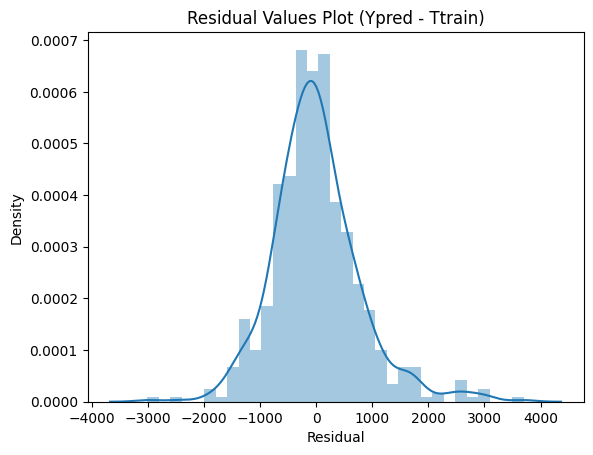

In [195]:
sns.distplot(residual)
plt.title('Residual Values Plot (Ypred - Ttrain)')
plt.xlabel('Residual')
plt.plot()


We can see that the residual distribution is normal. 

In [204]:
from sklearn.metrics import r2_score

In [206]:
#calculating R-squared score on predicted data
r2_score_train = r2_score(y_train, y_train_pred_df)
round(r2_score_train, 2)

0.84

**We have got the R2 score as 0.84**

### Prediction on Test Data

In [196]:
y_test_pred = model1_op.predict(X_test_sm)

In [197]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['cnt'])
y_test_pred_df.shape

(146, 1)

In [202]:
y_test.shape

(146, 1)

In [198]:
test_residual = y_test_pred_df - y_test

[]

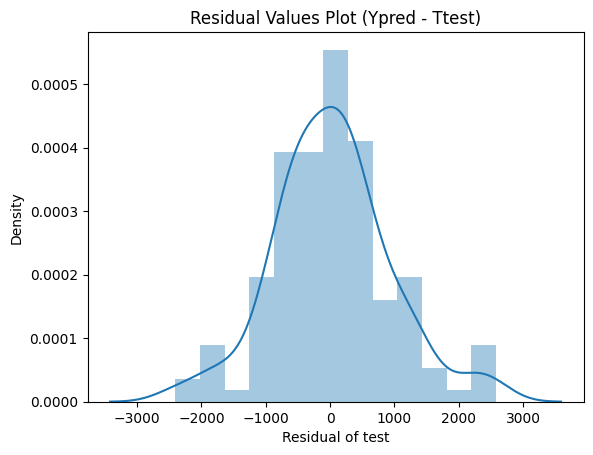

In [199]:
sns.distplot(test_residual)
plt.title('Residual Values Plot (Ypred - Ttest)')
plt.xlabel('Residual of test')
plt.plot()

Here also we can see that the distribution of the error is normal.

Let us calculate the R2 for the output. 

In [205]:
#calculating R-squared score on predicted data
r2_score_test = r2_score(y_test, y_test_pred_df)
round(r2_score_test,2)

0.76

In [208]:
residual.describe()

,cnt
count,5.840000e+02
mean,-1.245883e-13
std,7.921629e+02
min,-3.016065e+03
25%,-4.697592e+02
50%,-6.256339e+01
75%,3.844360e+02
max,3.700232e+03


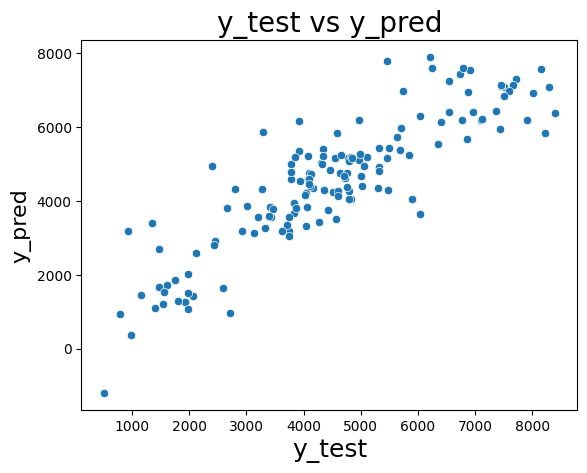

In [216]:
sns.scatterplot(x = y_test['cnt'], y = y_test_pred_df['cnt'])
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [1]:
1

1